# Librerías

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

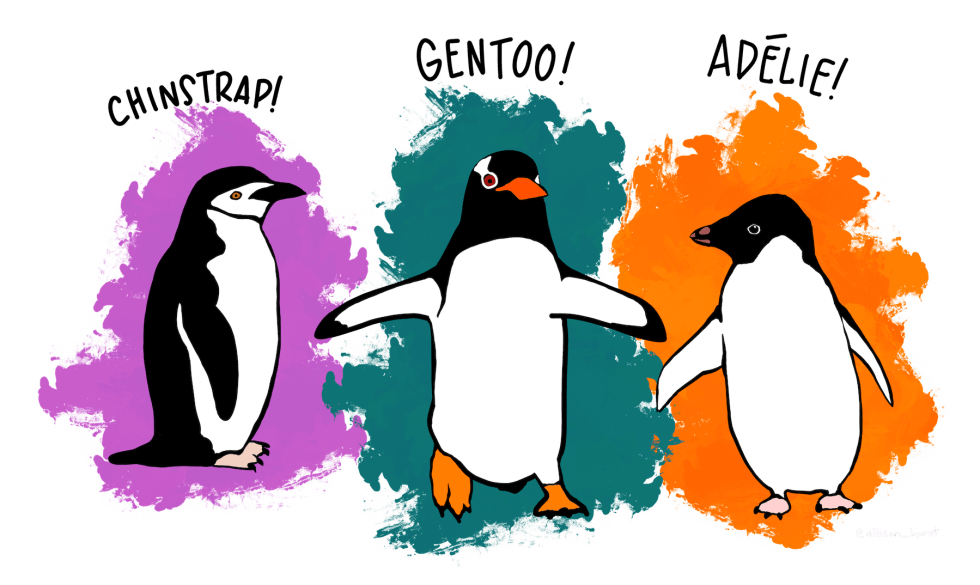

In [4]:
df= pd.read_csv('data/penguins_size.csv')

## Primera exploración 

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


std del body no es normal, habria que ver por qué hay tanta diferencia de tamaños.
La desviación estándar (media de lo alejados que están los datos de la media de esos datos). Media 0 y desv std 1 para que los datos sean normales.

In [10]:
df.shape

(344, 7)

In [11]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
# CARDINALIDAD, interesa para las variables tipo object
for i in df.select_dtypes(include=object):
        print(f'La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%')

La cardinalidad de la variable species es 0.87%
La cardinalidad de la variable island es 0.87%
La cardinalidad de la variable sex es 0.87%


¿por qué tienen la misma cardinalidad? porqeu las 3 variables tienen 3 tipos de valores únicos. PERO EL SEXO NO PUEDEN SER 3 (salían iguales antes de reemplazar los . por NAN)

In [6]:
df['sex'].unique()
# tenemos que reemplazar el . del sexo por nan

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

<Figure size 300x200 with 0 Axes>

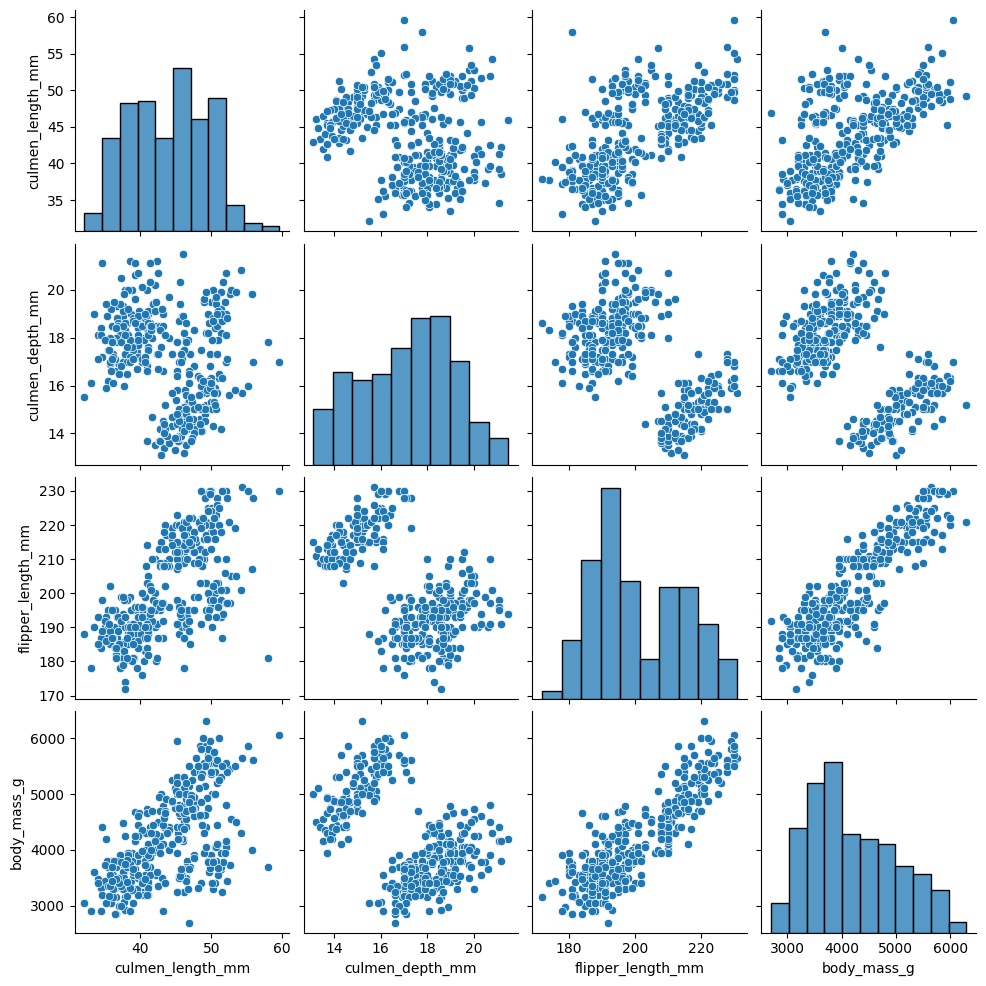

In [7]:
plt.figure(figsize=(3,2))
sns.pairplot(df)

# Hipótesis

### **Estadísticas**

1. Tamaño y sexo 
2. Especies y Caracter´´istica física
3. Aleta y masa corporal

### **Gráficamente**

1. Distribución de las características
2. Relación entre Longitud y Profundidad del Pico
3. Interacción entre Especies, Islas y Características Físicas.


### **Limpieza**

In [8]:
df['sex'].replace('.', np.nan, inplace=True)

In [9]:
df[(df['culmen_depth_mm'].isna()) |(df['culmen_length_mm'].isna())|(df['flipper_length_mm'].isna())|(df['body_mass_g'].isna())|(df['sex'].isna())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Se puede imputar el sexo en función del tamaño (los machos suelen ser más grandes), otra forma es respetar ya la proporcion existente. O hacerlo por especie y tamaño.

No se aconseja borrar datos para luego machine learning.





### IMPUTACION DE DATOS



In [10]:
for i in df.select_dtypes(exclude=object):
    print( i, df[i].mean())
    print( i, df[i].mean(skipna=False))

culmen_length_mm 43.9219298245614
culmen_length_mm nan
culmen_depth_mm 17.151169590643278
culmen_depth_mm nan
flipper_length_mm 200.91520467836258
flipper_length_mm nan
body_mass_g 4201.754385964912
body_mass_g nan


Este código de arriba está bien y no a la vez, porque .mean excluye por defecto los NAN

In [11]:
df.groupby('species').mean(numeric_only = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [ ]:
# df.groupby('species')[['culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g' ]].mean()  otra forma de hacer lo de arriba

In [12]:
df.groupby(['species', 'island', 'sex']).mean(numeric_only = True)
# en este caso podemos intercambiar island con sex y no cambia. Si pusiéramos sex primero, sí.


culmen_length_mm  culmen_depth_mm  \
species   island    sex                                         
Adelie    Biscoe    FEMALE         37.359091        17.704545   
                    MALE           40.590909        19.036364   
          Dream     FEMALE         36.911111        17.618519   
                    MALE           40.071429        18.839286   
          Torgersen FEMALE         37.554167        17.550000   
                    MALE           40.586957        19.391304   
Chinstrap Dream     FEMALE         46.573529        17.588235   
                    MALE           51.094118        19.252941   
Gentoo    Biscoe    FEMALE         45.563793        14.237931   
                    MALE           49.473770        15.718033   

                            flipper_length_mm  body_mass_g  
species   island    sex                                     
Adelie    Biscoe    FEMALE         187.181818  3369.318182  
                    MALE           190.409091  4050.000000  
          Dream     FEMALE         187.851852  3344.444444  
                    MALE           191.928571  4045.535714  
          Torgersen FEMALE         188.291667  3395.833333  
                    MALE           194.913043  4034.782609  
Chinstrap Dream     FEMALE         191.735294  3527.205882  
                    MALE           199.911765  3938.970588  
Gentoo    Biscoe    FEMALE         212.706897  4679.741379  
                    MALE           221.540984  5484.836066

In [13]:
df.groupby(['species', 'island', 'sex']).mean(numeric_only = True).reset_index()

,species,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Biscoe,FEMALE,37.359091,17.704545,187.181818,3369.318182
1,Adelie,Biscoe,MALE,40.590909,19.036364,190.409091,4050.000000
2,Adelie,Dream,FEMALE,36.911111,17.618519,187.851852,3344.444444
3,Adelie,Dream,MALE,40.071429,18.839286,191.928571,4045.535714
4,Adelie,Torgersen,FEMALE,37.554167,17.550000,188.291667,3395.833333
5,Adelie,Torgersen,MALE,40.586957,19.391304,194.913043,4034.782609
6,Chinstrap,Dream,FEMALE,46.573529,17.588235,191.735294,3527.205882
7,Chinstrap,Dream,MALE,51.094118,19.252941,199.911765,3938.970588
8,Gentoo,Biscoe,FEMALE,45.563793,14.237931,212.706897,4679.741379
9,Gentoo,Biscoe,MALE,49.473770,15.718033,221.540984,5484.836066


Ahora tengo colocados mejor los datos. Ahora podemos imputar los datos

In [14]:
df['flipper_length_mm'].unique()
# no es una variable continua por lo qe cambiamos la media por la mediana (debajo)

array([181., 186., 195.,  nan, 193., 190., 180., 182., 191., 198., 185.,
       197., 184., 194., 174., 189., 187., 183., 172., 178., 188., 196.,
       179., 200., 192., 202., 205., 208., 203., 199., 176., 210., 201.,
       212., 206., 207., 211., 230., 218., 215., 219., 209., 214., 216.,
       213., 217., 221., 222., 220., 225., 224., 231., 229., 223., 228.,
       226.])

agregate para calcular unas cosas a una variable y otra funcion a otras.
agregate pide dicc o listas. Con dic ponemos key las columnas yvalores laa funciones. 

In [15]:
datos_imp = df.groupby(['species', 'island', 'sex'])[['culmen_length_mm','culmen_depth_mm',	'flipper_length_mm','body_mass_g']].aggregate({'culmen_length_mm':'mean','culmen_depth_mm': 'mean',	'flipper_length_mm': 'median','body_mass_g':'median'}).reset_index()
datos_imp

,species,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Biscoe,FEMALE,37.359091,17.704545,187.0,3375.0
1,Adelie,Biscoe,MALE,40.590909,19.036364,191.0,4000.0
2,Adelie,Dream,FEMALE,36.911111,17.618519,188.0,3400.0
3,Adelie,Dream,MALE,40.071429,18.839286,190.5,3987.5
4,Adelie,Torgersen,FEMALE,37.554167,17.550000,189.0,3400.0
5,Adelie,Torgersen,MALE,40.586957,19.391304,195.0,4000.0
6,Chinstrap,Dream,FEMALE,46.573529,17.588235,192.0,3550.0
7,Chinstrap,Dream,MALE,51.094118,19.252941,200.5,3950.0
8,Gentoo,Biscoe,FEMALE,45.563793,14.237931,212.0,4700.0
9,Gentoo,Biscoe,MALE,49.473770,15.718033,221.0,5500.0


In [43]:
# df.where((df['culmen_length_mm'].isna())& (df['species']== 'Adele'))

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
datos_imp[(datos_imp['species'] == 'Adelie') & (datos_imp['island'] == 'Torgersen')]


,species,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
4,Adelie,Torgersen,FEMALE,37.554167,17.550000,189.0,3400.0
5,Adelie,Torgersen,MALE,40.586957,19.391304,195.0,4000.0


Basándonos en el DF justo arriba, queremos rellenar el sexo de los penguin. 
Restamos a cada valor de las columnas los valores correspondiente de esa columna del df de arriba (hecho con medias y medianas). El sexo del que la resta sea menor, imputo ese sexo para esa columna. 
Hago lo mismo con cada columna, culmen depth, flipper, body mass... y al final cuento el total de cada sexo por cada columna.
Ahora el SEXO que 'gane' (comparamos los resultads de cada columna) imputamos ese sexo al penguin

In [17]:
from scipy.spatial.distance import euclidean

def impute_sex(row):
    if pd.isna(row['sex']):
        filas_relevantes = datos_imp[(datos_imp['species'] == row['species']) & (datos_imp['island'] == row['island'])]
        min_distancia = float('inf')
        sex_a_imputar = None

        for _,  r_row in filas_relevantes.iterrows():
            distancia = euclidean(row[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(0),
                                  r_row[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(0))
            if distancia < min_distancia:
                min_distancia = distancia
                sex_a_imputar = r_row['sex']

        return sex_a_imputar
    else:
        return row['sex']
    
df['sex'] = df.apply(impute_sex, axis = 1)

df

    

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [21]:
df.loc[3, 'sex'] = np.nan
df.loc[339, 'sex'] = np.nan

# esto es porque en al funcion no habiamos puesto que si TODA LA FILA era nan, dejase nan


In [27]:
df2 = df[(df['culmen_depth_mm'].isna()) |(df['culmen_length_mm'].isna())|(df['flipper_length_mm'].isna())|(df['body_mass_g'].isna())|(df['sex'].isna())]

In [23]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [25]:
# ¿qué hacemos con estas filas?
df.groupby(['species', 'island']).count()
# vemos que la distribución de adelie es practicamente igual en las 3 islas, por lo que podemos imputar teniendo en cuenta solo la especie y la isla


culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   island                                                            
Adelie    Biscoe                   44               44                 44   
          Dream                    56               56                 56   
          Torgersen                51               51                 51   
Chinstrap Dream                    68               68                 68   
Gentoo    Biscoe                  123              123                123   

                     body_mass_g  sex  
species   island                       
Adelie    Biscoe              44   44  
          Dream               56   56  
          Torgersen           51   51  
Chinstrap Dream               68   68  
Gentoo    Biscoe             123  123

In [30]:
df_imp_2 = df.groupby(['species', 'island'])[['culmen_length_mm','culmen_depth_mm',	'flipper_length_mm','body_mass_g']].aggregate(
    {'culmen_length_mm':'mean','culmen_depth_mm': 'mean',	'flipper_length_mm': 'median','body_mass_g':'median'}).reset_index()


In [31]:
merged_df = pd.merge(df2, df_imp_2, how='left', on= ['species', 'island'])
merged_df = merged_df.assign( sex = lambda x : x['culmen_length_mm_x'].fillna(x['culmen_length_mm_y']),)

,species,island,culmen_length_mm_x,culmen_depth_mm_x,flipper_length_mm_x,body_mass_g_x,sex,culmen_length_mm_y,culmen_depth_mm_y,flipper_length_mm_y,body_mass_g_y
0,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,38.950980,18.429412,191.0,3700.0
1,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,47.504878,14.982114,216.0,5000.0


In [ ]:
# función con lambda qpara rellenar los nan

**Guardar DF**

In [ ]:
# df.to_csv....

## **ANÁLISIS**

### Análisis univariante